In [1]:
import os
import sys
import itertools

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

if '..' not in sys.path: sys.path.insert(0, '..')
from common import colors


In [2]:
x,p = var('x,p')
def taylor_series(f, order, i=0, xVal=0):
    if order < 0:
        return 0
    return f(x=xVal)*(p^i/factorial(i)) + taylor_series(diff(f, x), order-1, i+1, xVal)

def color_generator():
    for c in itertools.chain(*[colors.bar_indexed for x in range(10)]):
        yield c
color_cycle = color_generator()

def show_taylor_series(f, order, min_x=-4, max_x=4, min_y=-10, max_y=5):
    def plot_func(f, label, color=None, **kwargs):
        if not color:
            color = color_cycle.next()
        return plot(f, (x,min_x,max_x), ymin=min_y, ymax=max_y, legend_label=label, color=color, **kwargs)

    x = var('x')
    f = sage_eval(f, locals={'x': x})
    all_plots = [plot_func(f, "f(x)", thickness=6)]
    df_all = []
    df = f
    for i in range(order):
        df = diff(df, x)
        all_plots.append(plot_func(df, "f{}(x)".format("'"*(i+1)), thickness=2))
    
    approximation = taylor_series(f, order)
    all_plots.append(plot_func(approximation,"taylor(f(x)) @ {}".format(order), color="black"))
    show(sum(all_plots))

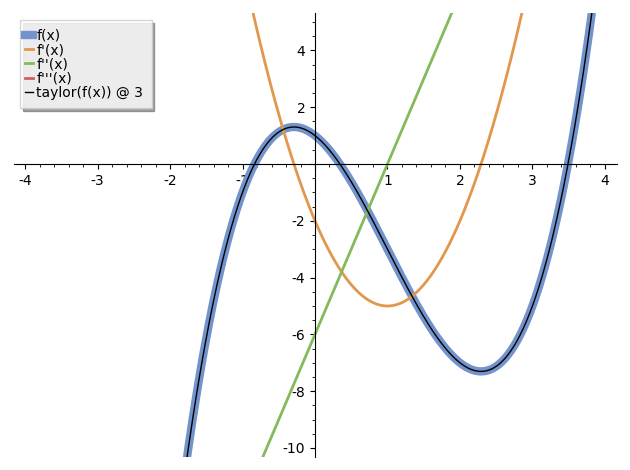

In [3]:
@interact(f=widgets.Text('x^3 - 3*x^2 - 2*x + 1'), order=widgets.IntSlider(min=0,max=4,step=1,value=3))
def third_order(f, order):
    show_taylor_series(f, order)

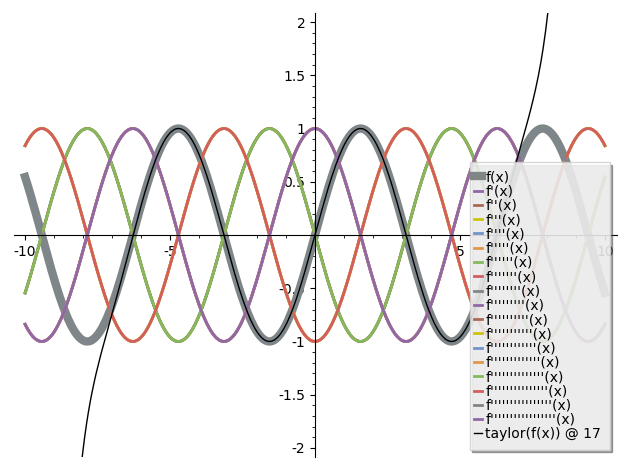

In [4]:
@interact(f=widgets.Text('sin(x)'), order=widgets.IntSlider(min=0,max=20,step=1,value=17))
def sin(f, order):
    show_taylor_series(f, order, min_x=-10, max_x=10, min_y=-2, max_y=2)